# Bootstrapping
* Notebook completed by Adam Lang
* Date: 4/10/2024
* This notebook will go over Statistical Bootstrapping principles and python implementation.
* This was completed as part of the Springboard Data Science fellowship and LinkedIn Learning course "Python Statistics Essential Training."

In [1]:
# import libraries
import math
import io

#numpy and pandas
import numpy as np
import pandas as pd

# import viz libraries
import matplotlib.pyplot as plt
%matplotlib inline

# scipy libraries
import scipy.stats
import scipy.optimize
import scipy.spatial

# Case Study Scenario:
* We will continue the case study below in this notebook using Statistical Bootstrapping.
    * **This time the sample population interviewed we will ask them to give the Candidate for Mayor a grade between 0 and 10.**
    * **Scenario: You are "feeling lazy" so you only take 100 samples.**


* A very important election is taking place in the city you live in, you work for the local newspaper and you are asked to poll the local population with a sample size of 1000 people and ask who they will vote for.


* The candidates for the election are:
  1. "Brown" - incumbent mayor
  2. "Green" - a local chef running against him.



In [2]:
## load dataset "grades"
pop = pd.read_csv("/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/grades.csv")

In [3]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


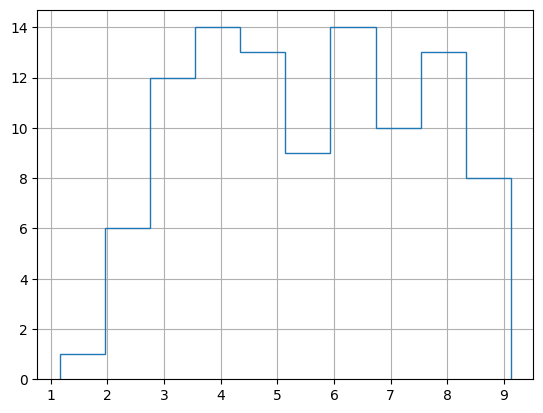

In [5]:
## histogram summary stats
pop.grade.hist(histtype="step");

In [6]:
# describe stats
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


Summary:
* Interesting no one gave the mayor a grade of 10.
* The mean of the sample is 5.5. What can we say about this? Is it a normal distribution?

# Sampling with replacement = Bootstrapping

In [8]:
# population sample with replacement (bootstrap)
pop.sample(100, replace=True).describe()

,grade
count,100.000000
mean,5.304695
std,1.986896
min,1.160899
25%,3.692472
50%,5.075965
75%,7.387370
max,8.522332


#### Generate 1000 bootstrap samples

In [9]:
# generate bootstraps into a dataframe
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

In [10]:
# head of bootstrap df
bootstrap.head()

,meangrade
0,5.658929
1,5.585087
2,5.379219
3,5.702004
4,5.441880


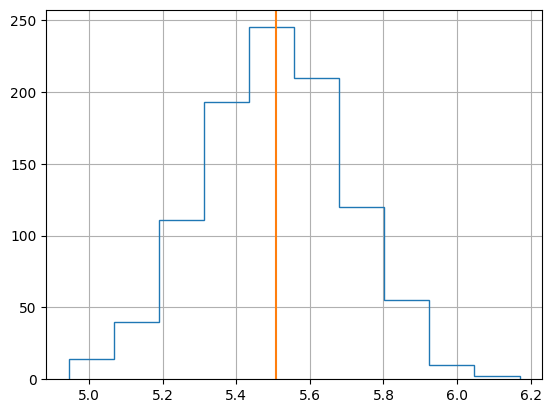

In [15]:
# histogram of bootstrap frame
bootstrap.meangrade.hist(histtype="step");
# show original mean drawn as line on top of this
plt.axvline(pop.grade.mean(),color='C1')

Extract the Quantiles

In [16]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.117879646468427, 5.896836953446303)

Plot normal distribution

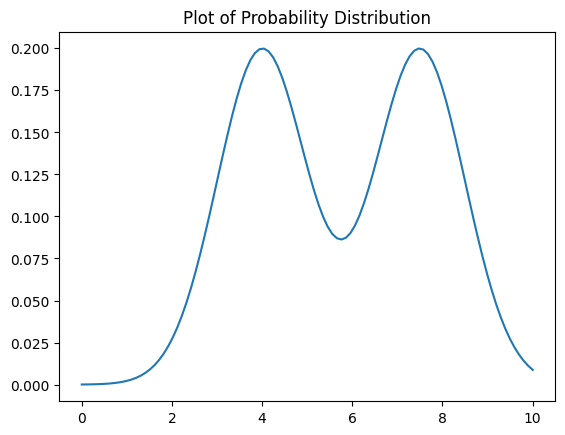

In [17]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
plt.plot(x, 0.5*n1.pdf(x) + 0.5*n2.pdf(x))
plt.title("Plot of Probability Distribution");

Summary: Bimodal distribution

### Draw random samples

In [18]:
def draw():
  while True:
    v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
    if 0 <= v <= 10:
      return v

In [19]:
# draw sample
draw()

5.8804951816416455

### Make Dataset by calling draw function repeatedly

In [20]:
def dataset(n=100):
  return pd.DataFrame({'grade': [draw() for i in range(n)]})

### Histogram a few of these samples

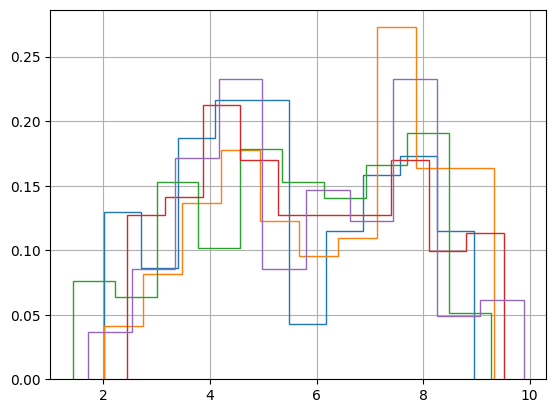

In [21]:
for i in range(5):
  dataset(100).grade.hist(histtype='step', density=True)

In [22]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

### View histogram and compare to bootstrap distribution

Text(0.5, 1.0, 'Histogram comparison of means vs. bootstrap means')

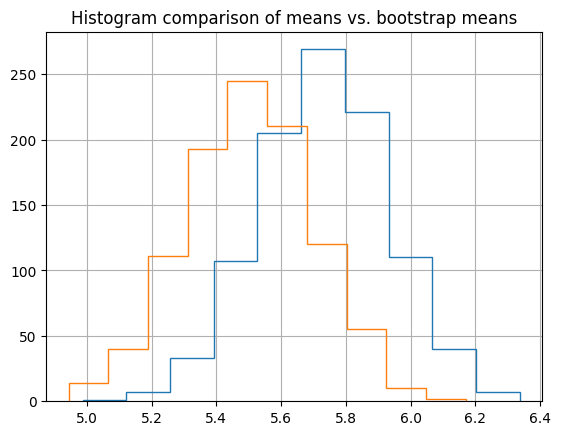

In [24]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step');
plt.title("Histogram comparison of means vs. bootstrap means")